In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
dataset = dataset.set_index('CustomerID')

In [4]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
scaler = StandardScaler()

In [7]:
categorical_cols = ['Gender']
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
dataset[categorical_cols] = encoder.fit_transform(dataset[categorical_cols])
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

In [8]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.0,-1.424569,-1.738999,-0.434801
2,1.0,-1.281035,-1.738999,1.195704
3,0.0,-1.352802,-1.700830,-1.715913
4,0.0,-1.137502,-1.700830,1.040418
5,0.0,-0.563369,-1.662660,-0.395980


In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
# find best model
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    ''' scorer to be passed to grid search'''
    return -estimator.bic(X)

param_grid = {'n_components': range(2,10),
             'covariance_type': ["full", "tied", "diag", "spherical"],
             'init_params':['kmeans','k-means++'],
             'reg_covar':[1e-6,1e-5,1e-4,1e-3],
             'n_init':[10]}

grid_search = GridSearchCV(GaussianMixture(random_state=42), param_grid = param_grid, scoring=gmm_bic_score, n_jobs=-1)
grid_search.fit(dataset)
#gmm = GaussianMixture(n_components = i, covariance_type='full', tol=1e-3,max_iter=500,n_init=10, init_params='kmeans', random_state=42)
#gmm.fit(dataset)

    

GridSearchCV(estimator=GaussianMixture(random_state=42), n_jobs=-1,
             param_grid={'covariance_type': ['full', 'tied', 'diag',
                                             'spherical'],
                         'init_params': ['kmeans', 'k-means++'],
                         'n_components': range(2, 10), 'n_init': [10],
                         'reg_covar': [1e-06, 1e-05, 0.0001, 0.001]},
             scoring=<function gmm_bic_score at 0x7fcb5b111630>)

In [11]:
gm = grid_search.best_estimator_

In [12]:
gm

GaussianMixture(covariance_type='diag', init_params='k-means++', n_components=5,
                n_init=10, random_state=42)

In [13]:
customer_segments = gm.predict(dataset)

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [15]:
pca_components = PCA(n_components = 3, copy=True).fit_transform(dataset)

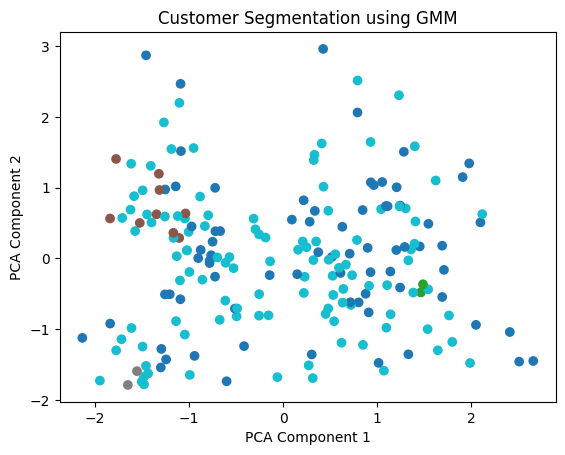

In [16]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=customer_segments, cmap='tab10')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation using GMM")
plt.show()